In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth

import matplotlib.animation as animation
from matplotlib.colors import ListedColormap, BoundaryNorm

In [176]:
data = pd.read_csv("SIRS_data.txt", sep=" ",header = None)

In [177]:
dt = np.array(data)

In [178]:
len(dt)

401

In [179]:
#dt[0]

In [180]:
np.zeros(19)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [181]:
len(dt[0])

10001

In [182]:
list(range(0, 5))

[0, 1, 2, 3, 4]

In [183]:
def one_frame(a):
    N = int(mth.sqrt(len(a)-1))
    b = np.zeros((N, N),float)
    for i in range(0,N):
        for j in range(0,N):
            b[i][j] = a[N*i + j]
    return (b)

In [184]:
#one_frame(dt[0])

In [185]:
#ax = plt.pcolormesh(one_frame(dt[2]), cmap='Set1',edgecolors='white')
#plt.show()

In [186]:
print(one_frame(dt[0]).shape)

(100, 100)


In [187]:
N = int(mth.sqrt(len(dt[0])-1))
tau_l = 6
tau_max = 10

total_time = len(dt)

infected = np.zeros(total_time)
recovering = np.zeros(total_time)
susceptible = np.zeros(total_time)

for i in range(0,total_time):
    for j in range(0, N*N):
        if dt[i][j] ==0 :
            susceptible[i] += 1
        if (dt[i][j]>=1 and dt[i][j]<=tau_l) :
            infected[i] += 1
        if (dt[i][j]>tau_l and dt[i][j]<=tau_max) :
            recovering[i] += 1

In [193]:
# Calculating average values of infected, reccovering and susceptible
# cells after the system reached equilibrium.

avg_inf = 0
avg_rec = 0
avg_sus = 0

# dummy variables
a, b, c = 0, 0, 0

time_equi = 145

for i in range(time_equi, total_time):
    a += infected[i]
    b += recovering[i]
    c += susceptible[i]

del_t = total_time - time_equi
avg_inf, avg_rec, avg_sus = a/del_t, b/del_t, c/del_t

print(avg_inf, avg_rec, avg_sus)

4512.51953125 3007.71875 2479.76171875


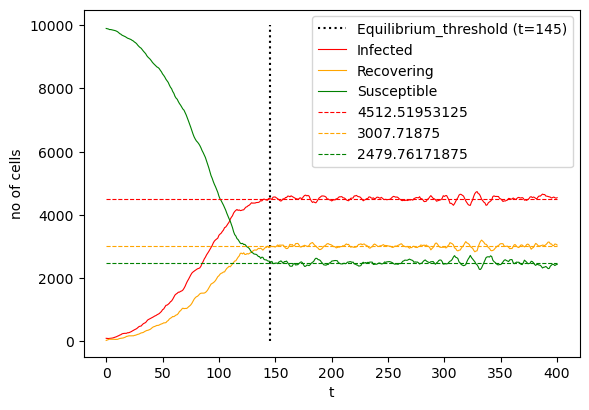

In [201]:
line_width = 0.8
ax = plt.axes(box_aspect = 0.7)

ax.plot([time_equi, time_equi],[0, N*N], linestyle="dotted", c = "black", label=f"Equilibrium_threshold (t={time_equi})")

ax.plot(infected, label="Infected", lw = line_width, c = "red")
ax.plot(recovering, label="Recovering", lw = line_width, c = "orange")
ax.plot(susceptible, label="Susceptible", lw = line_width , c = "green")

ax.plot([0, total_time-1],[avg_inf, avg_inf], "--", label=f'{avg_inf}', lw = line_width, c = "red")
ax.plot([0, total_time-1],[avg_rec, avg_rec], "--", label=f'{avg_rec}', lw = line_width, c = "orange")
ax.plot([0, total_time-1],[avg_sus, avg_sus], "--", label=f'{avg_sus}', lw = line_width, c = "green")

ax.set_xlabel("t")
ax.set_ylabel("no of cells")

ax.legend()
plt.show()

MovieWriter Pillow unavailable; using Pillow instead.


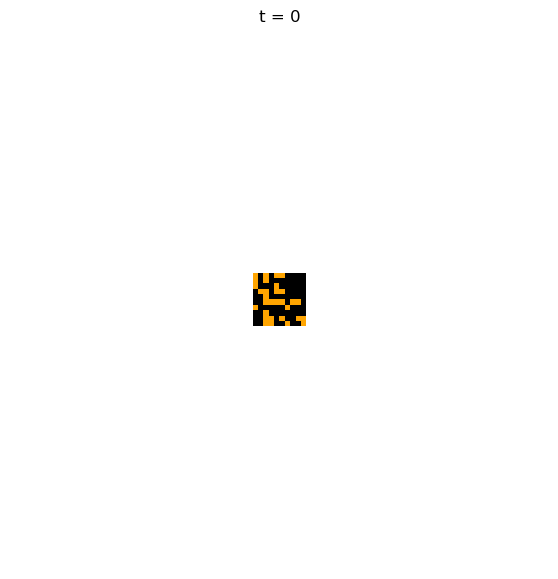

In [190]:
# Srujith's plotting animation method

# Define custom colors and normalization
cmap = ListedColormap(['white', 'black', 'orange'])
bounds = [0, 1, tau_l, tau_max]
norm = BoundaryNorm(bounds, cmap.N)

# Create the figure and axis for animation
fig, ax = plt.subplots(figsize=(7, 7))

# Function to update the plot for each frame
def update(frame):
    ax.clear() # Clear the previous image
    ax.imshow(one_frame(dt[frame]), cmap=cmap, norm=norm, interpolation='none')
    ax.set_title(f't = {frame}')
    ax.axis('off') # Optionally hide axes for a cleaner look

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(dt), interval=50) # 200ms delay
ani.save("SIRS_model.gif", writer = 'Pillow', fps = 10)